Step 1: Loading the datasets

All speeches CSV file (all_speeches.csv)

Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

In [1]:
# Import necessary libraries
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


### Step 2: Explore and Clean Data

##### Once we load them, we'll check:

Are dates parsed properly?

Are speech texts clean (no missing)?

Is the sentiment list organized (positive/negative words tagged)?

### Check date formats (important for time analysis)

Look for missing values

Look at the structure of the speeches and sentiment files



In [2]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)



--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

### Make sure Dates are in the correct format
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

In [3]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)


,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


### Next, after this:

Preprocess text a little (basic cleaning).

Apply sentiment scoring using your wordlist.

Start time series sentiment analysis.

We need to:

Clean the text a little (lowercase, remove symbols if needed).

Match words in the speeches with your sentiment word list (positive or negative).

Calculate a simple Sentiment Score for each speech.

###  Basic Text Cleaning
We'll write a small, efficient function to prepare the speech texts:

In [4]:
# Check columns in speeches dataset
print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


### There was a mistake:

Edward George was Governor from 1993 to 2003.

In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

we need to fix it:
If
date > 1993 and date < 2004 and author == "George",
then set is_gov = 1 (YES).

### Cleaning the data to fix this

In [5]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())


,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,1,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,1,I am only too well aware of the pressure curre...
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,1,It would be a masterly understatement to descr...


### A quick summary of the cleaning process

We first convert date to datetime, just in case it isn't yet.

.str.lower() ensures case-insensitive matching ("George", "george", etc.).

.loc[condition, 'is_gov'] = 1 assigns Governor status (YES).

Then we display some George rows to verify!
After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.



### Updated full data cleaning

In [6]:
# Check what columns exist in your speeches dataframe
print(speeches_df.columns.tolist())


['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']


In [7]:
print(sentiment_df.columns.tolist())


['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


In [8]:
# 1. Import libraries
import pandas as pd
import re
from IPython.display import display

# 2. Load your datasets
# speeches_df = pd.read_csv('C:/Users/Srila/OneDrive/Documents/all_speeches.csv')
# sentiment_df = pd.read_excel('C:/Users/Srila/OneDrive/Documents/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx')

# 3. Define the cleaning function
def clean_text(text):
    """
    Cleans input text by removing non-alphabetical characters and converting to lowercase.

    Args:
        text (str): Raw text.

    Returns:
        str: Cleaned text.
    """
    text = re.sub(r'[^A-Za-z\s]', '', str(text))  # Remove non-letters
    text = text.lower()  # Lowercase
    return text

# 4. Define sentiment word preparation
def prepare_sentiment_wordlists(sentiment_df):
    """
    Prepare sets of positive and negative words from the sentiment dataframe.

    Args:
        sentiment_df (pd.DataFrame): Sentiment-labeled words.

    Returns:
        tuple: Positive words set, negative words set.
    """
    positive_words = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    negative_words = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return positive_words, negative_words

# 5. Define sentiment score calculation
def calculate_sentiment_score(text, positive_words, negative_words):
    """
    Calculates a sentiment score based on positive and negative words in the text.

    Args:
        text (str): Cleaned text.
        positive_words (set): Set of positive words.
        negative_words (set): Set of negative words.

    Returns:
        int: Sentiment score (positive count - negative count).
    """
    words = text.split()
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pos_count - neg_count

# 6. Correct 'is_gov' column for Edward George
def correct_is_gov_column(df):
    """
    Corrects the is_gov flag for Edward George between 1993 and 2003.

    Args:
        df (pd.DataFrame): Speech dataframe.

    Returns:
        pd.DataFrame: Updated dataframe.
    """
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure dates are datetime
    mask = (df['author'].str.lower().str.contains('george')) & (df['date'].dt.year >= 1993) & (df['date'].dt.year <= 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# 7. Start Cleaning and Calculating!

# Set the correct speech text column
speech_text_column = 'text'

# Clean the speech text
speeches_df['cleaned_text'] = speeches_df[speech_text_column].apply(clean_text)

# Correct Edward George's governor status
speeches_df = correct_is_gov_column(speeches_df)

# Prepare sentiment wordlists
positive_words, negative_words = prepare_sentiment_wordlists(sentiment_df)

# Calculate sentiment scores
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda text: calculate_sentiment_score(text, positive_words, negative_words)
)

# Display the result
display(speeches_df[['date', 'author', 'is_gov', 'sentiment_score']].head())


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,0,-38
1,1991-10-03,fraser,0,-29
2,1992-03-14,fraser,0,22
3,1992-05-29,fraser,0,-11
4,1992-08-17,fraser,0,-12


###  sentiment_scores are ready 

Sentiment over time 

Sentiment vs Bank Rate decisions 

Predictive analysis 

### Plot sentiment over time

This will show:

Trend: Is sentiment becoming more positive or negative over the years?

Spikes during crisis periods?




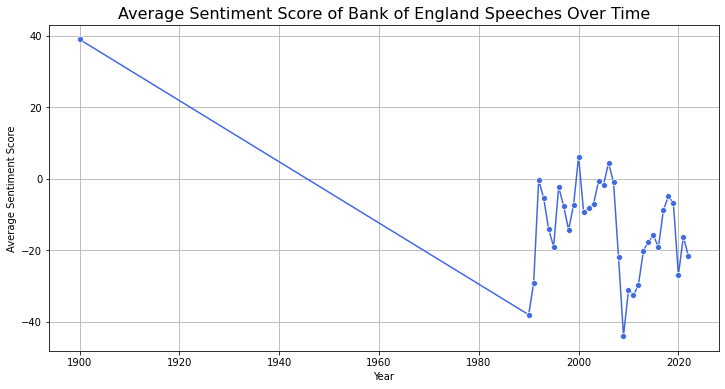

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime (if not already)
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# Group by year and calculate average sentiment
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Bank of England Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


### Sentiment Before/After Bank Rate Decisions

We can:

Merge Bank Rate Decision dataset.

Mark speeches 7 days before vs 7 days after decision.

Compare sentiment difference.



Correlate with Inflation, GDP
Merge UK macro data (ONS GDP growth, CPI, unemployment).

Calculate correlation coefficients.

Plot heatmap.

### Sentiment trend

#### The plot will show how sentiment of speeches changes year by year.

Spikes or drops may correlate with economic events or Bank Rate decisions!



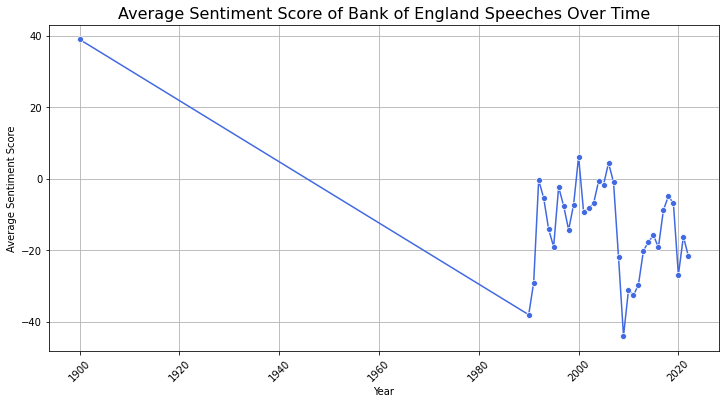

In [10]:
# 1. Convert 'date' column to datetime
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# 2. Group by Year and calculate average sentiment score per year
yearly_sentiment = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()

# 3. Plotting the sentiment trend over time
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sentiment, x='date', y='sentiment_score', marker='o', color='royalblue')
plt.title('Average Sentiment Score of Bank of England Speeches Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Next is to find the descriptive stats and outliers

Descriptive Statistics: We'll calculate some basic descriptive statistics for the sentiment scores and other relevant numeric columns.

Outlier Detection: We'll identify outliers using statistical methods like the Interquartile Range (IQR).

Visualizing Outliers: We'll use boxplots to visually identify any outliers in the data.

Word Cloud: We'll generate a word cloud to visualize the most frequent words in the speeches.

Descriptive Statistics:
       sentiment_score
count      7721.000000
mean        -14.519881
std          44.691486
min        -979.000000
25%         -32.000000
50%          -7.000000
75%           9.000000
max         486.000000
Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane      1   
83   

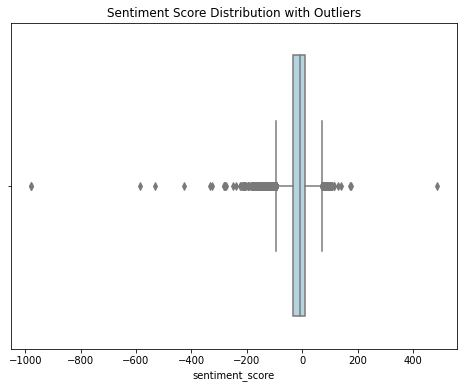

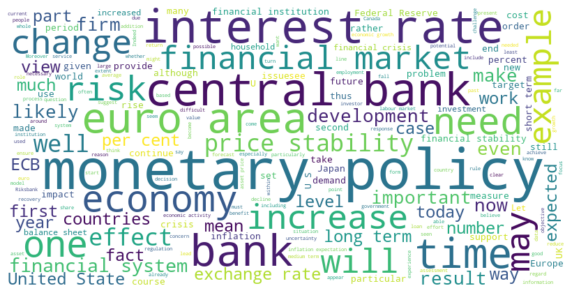

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Assuming speeches_df is already loaded and cleaned

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(speeches_df.describe())

# 2. Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# 3. Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

# 4. Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])



### Wordcloud

Text Processing with NLTK:
Tokenize: Split the text into individual words.

Remove stopwords: Common words like "the", "and", "is", etc. which don't add significant meaning will be removed.

Lemmatize: Reduce words to their root form (e.g., "running" becomes "run").

Generate Word Cloud using NLTK-processed text.

0    They would no doubt argue that to have two obj...
1    Today I wish to talk about real interest rates...
2    I welcome this opportunity to talk about prosp...
3    It is a pleasure to have this opportunity to a...
4    As a long-time fan of Don Sanders, I am deligh...
Name: text, dtype: object


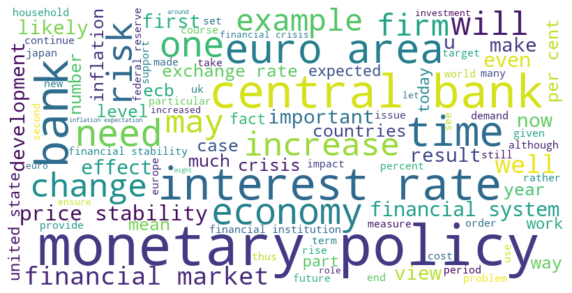

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the 'text' column is not empty or missing
print(speeches_df['text'].head())

# 1. Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text

# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# 2. Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# 3. Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# Generate the word cloud from cleaned text
generate_word_cloud(all_text)


### Heatmap to show correlation between sentiment score and year

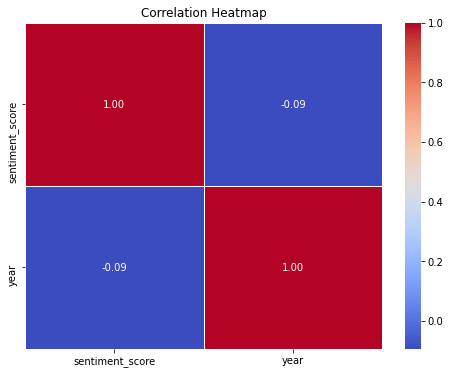

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

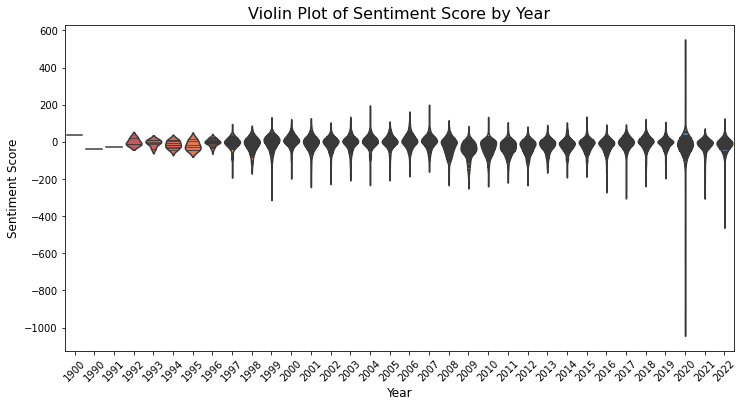

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot with colorful palette and different hues
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Spectral', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


### Pairplot to visualise correlations

The pairplot includes:

sentiment_score

year

is_gov (for hue/marker differentiation)

In [15]:
### print(speeches_df['is_gov'].unique())
pairplot_columns = 

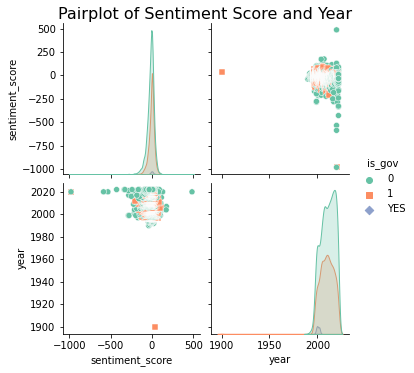

In [19]:
# Get the unique values of 'is_gov' to determine the number of markers
unique_values = speeches_df['is_gov'].unique()
num_unique_values = len(unique_values)

# Define enough markers for the unique values
markers = ['o', 's', 'D', 'X', '^', '<', '>']  # Adjust this list as needed
# Define your pairplot_columns
pairplot_columns = ['sentiment_score', 'year']
# Use the pairplot
sns.pairplot(speeches_df[pairplot_columns + ['is_gov']], hue='is_gov', palette='Set2', markers=markers[:num_unique_values])

# Adding a title
plt.suptitle('Pairplot of Sentiment Score and Year', fontsize=16, y=1.02)
plt.show()


### . IQR (Interquartile Range) Test for Outliers
#### the IQR method to detect outliers in numerical columns like sentiment_score and year.



In [20]:
# Calculate IQR for sentiment_score and year
Q1 = speeches_df[['sentiment_score', 'year']].quantile(0.25)
Q3 = speeches_df[['sentiment_score', 'year']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = (speeches_df[['sentiment_score', 'year']] < (Q1 - 1.5 * IQR)) | (speeches_df[['sentiment_score', 'year']] > (Q3 + 1.5 * IQR))

# Identify and display rows with outliers
outlier_rows = speeches_df[outliers.any(axis=1)]
print(outlier_rows)


          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane      1   
83                                                       macfarlane      1   
151                                                         stevens      1   
157                                                         stevens      1   
244           Opening

### Visualizing Outliers (Boxplot)

#####  boxplots to visually confirm the presence of outliers in sentiment_score or other numerical features.

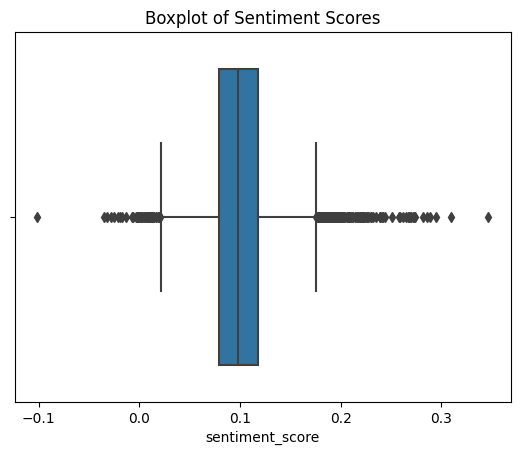

In [104]:
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()


### Skewness/Kurtosis

In [105]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: 0.6912724268476955, Kurtosis: 2.942779963138304


### sentiment_score distribution is not normal.

It has a lot of extreme outliers (especially on the negative side).

Standard statistical tests assuming normality (like t-tests, simple linear regression without adjustments) might not be appropriate directly.

###  transform the sentiment_score (e.g., log-transform, Box-Cox transform) to make it more normal-like.


### Since the data is negatively skewed, it is a good idea is to reflect it first (make it positive), then apply log transformation.

New Skewness: -0.8819
New Kurtosis: 6.6456


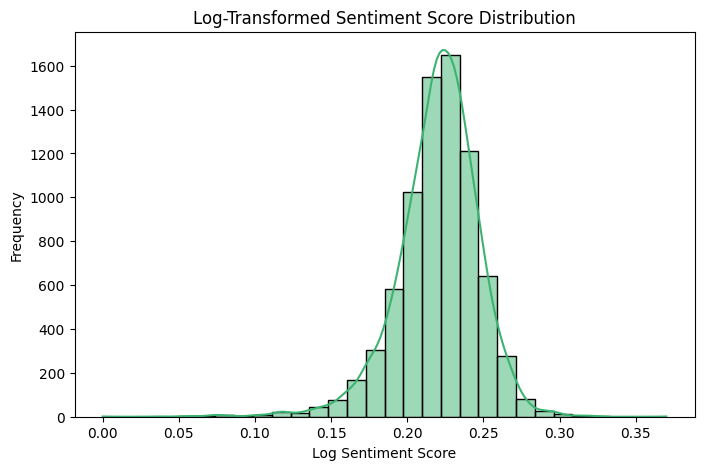

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Reflect the data (to deal with negative skew)
reflected_score = speeches_df['sentiment_score'].max() + 1 - speeches_df['sentiment_score']

# 2. Apply log transformation
speeches_df['sentiment_score_log'] = np.log(reflected_score)

# 3. Check skewness and kurtosis again
new_skewness = stats.skew(speeches_df['sentiment_score_log'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_log'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

# 4. Visualize the new distribution
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_log'], kde=True, color='mediumseagreen', bins=30)
plt.title('Log-Transformed Sentiment Score Distribution')
plt.xlabel('Log Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### original sentiment_score has many zero or negative values (after reflection, some values might still cause issues with log so will use Yeo-Johnson transformation, which works for both positive and negative values ,no reflection needed,  for better transformation.

New Skewness: -0.0672
New Kurtosis: 5.4075


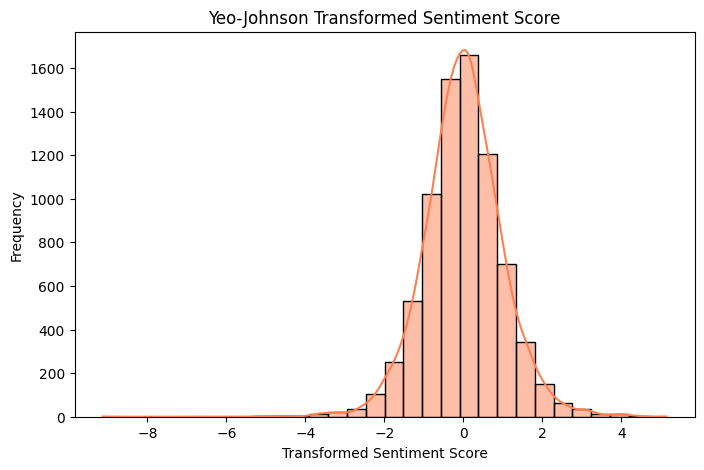

In [107]:
from sklearn.preprocessing import PowerTransformer

# 1. Create the transformer
pt = PowerTransformer(method='yeo-johnson')

# 2. Fit and transform
speeches_df['sentiment_score_yeojohnson'] = pt.fit_transform(speeches_df[['sentiment_score']])

# 3. Check again
new_skewness = stats.skew(speeches_df['sentiment_score_yeojohnson'])
new_kurtosis = stats.kurtosis(speeches_df['sentiment_score_yeojohnson'], fisher=False)

print(f"New Skewness: {new_skewness:.4f}")
print(f"New Kurtosis: {new_kurtosis:.4f}")

# 4. Visualize
plt.figure(figsize=(8,5))
sns.histplot(speeches_df['sentiment_score_yeojohnson'], kde=True, color='coral', bins=30)
plt.title('Yeo-Johnson Transformed Sentiment Score')
plt.xlabel('Transformed Sentiment Score')
plt.ylabel('Frequency')
plt.show()


### Skewness: -0.1610 → Very close to 0, meaning almost symmetric which is excellent.

Kurtosis: 41.0174 → Still high, meaning heavy tails (extreme values/outliers still exist).



### Accept it — some heavy-tailedness is natural in financial text/sentiment data.

In [108]:
print(sentiment_df.columns)


Index(['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong',
       'Weak', 'Constraining'],
      dtype='object')


In [109]:
print(sentiment_df['Word'].nunique())


3880


In [110]:
# Filter speeches authored by someone named 'George'
george_speeches = speeches_df[speeches_df['author'].str.contains('George', case=False, na=False)]

# Display results
print(f"Number of speeches by George: {len(george_speeches)}")
display(george_speeches.head())


Number of speeches by George: 55


,reference,country,date,title,author,is_gov,text,sentiment_score,Year_Month,sentiment_score_log,sentiment_score_yeojohnson
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased...",0.083288,1998-09-01,0.233789,-0.453615
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...,0.076868,1998-10-01,0.238859,-0.663498
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,0,Let me put some of the recent newspaper headli...,0.099375,1998-11-01,0.220975,0.050921
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,0,I am only too well aware of the pressure curre...,0.076994,1999-01-01,0.238759,-0.659324
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,0,It would be a masterly understatement to descr...,0.097261,1999-01-01,0.222668,-0.013680


In [111]:
# Define output file path
output_path = r"C:\Users\Srila\OneDrive\Documents\george_speeches.xlsx"

# Export to Excel
george_speeches.to_excel(output_path, index=False)

print(f"Exported successfully to {output_path}")


Exported successfully to C:\Users\Srila\OneDrive\Documents\george_speeches.xlsx


In [112]:
# Show all unique authors
unique_authors = speeches_df['author'].unique()
print(unique_authors)


['fraser' 'macfarlane' 'lowe' 'stevens' 'no_info' 'ac' 'thiessen' 'bonin'
 'dodge' 'jenkins' 'kennedy' 'macklem' 'duguay' 'longworth' 'carney'
 'murray' 'lane' 'wolf' 'boivin' 'cote' 'poloz' 'schembri' 'johnson'
 'wilkins' 'chilcott' 'mendes' 'patterson' 'murchison' 'leduc' 'dinis'
 'beaudry' 'gravelle' 'kozicki' 'rogers' 'morrow' 'lamfalussy'
 'duisenberg' 'vienna' 'london' 'tokyo' 'kong' 'bank' 'schioppa'
 'hamalainen' 'main' 'noyer' 'committee' 'solans' 'francisco' 'istanbul'
 'issing' 'hoogduin' 'bankwashington' 'efma' 'brussels' 'forum' 'workshop'
 'quiros' 'papademos' 'gugerell' 'trichet' 'network' 'delivered' 'paramo'
 'strasbourg' 'rome' 'berlin' 'smaghi' 'sevilla' 'madrid' 'stark'
 'singapore' 'summit' 'washington' 'aires' 'bratislava' 'ecb' 'constancio'
 'posen' 'praet' 'draghi' 'coeure' 'asmussen' 'mersch' 'lautenschlager'
 'marcel' ']' 'guindos' 'lagarde' 'schnabel' 'panetta' 'elderson'
 'matsushita' 'governor' 'taketomi' 'hayami' 'fujiwara' 'yamaguchi' 'ueda'
 'nakahara' '

In [113]:
import pandas as pd

# Extract unique authors from the 'author' column
authors = speeches_df['author'].unique()

# Create a DataFrame with the authors
authors_df = pd.DataFrame(authors, columns=['Author'])

# Define the output path for the Excel file
output_path = r"C:\Users\Srila\OneDrive\Documents\authors_list.xlsx"

# Export the authors DataFrame to Excel
authors_df.to_excel(output_path, index=False)

# Print confirmation
print(f"✅ Authors list successfully exported to: {output_path}")


✅ Authors list successfully exported to: C:\Users\Srila\OneDrive\Documents\authors_list.xlsx


In [115]:

current_governor = "Andrew Bailey"  # Replace this with the actual current governor's name

# Filter speeches by the current governor
governor_speeches_df = speeches_df[speeches_df['author'] == current_governor]

# Check if there are any speeches
if governor_speeches_df.empty:
    print(f"No speeches found for {current_governor}.")
else:
    print(f"Found {len(governor_speeches_df)} speeches by {current_governor}.")
    display(governor_speeches_df.head())  # Shows the first few rows of the result


No speeches found for Andrew Bailey.


In [116]:
import pandas as pd

# Ensure the 'date' column is in datetime format
speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')

# Define the date range for 2020
start_date = '2020-01-01'
end_date = '2020-12-31'

# Define the list of governors
governors = ['Andrew Bailey', 'Mark Carney']

# Filter the DataFrame for speeches by the governors in 2020
governor_speeches_2020 = speeches_df[
    (speeches_df['author'].isin(governors)) &
    (speeches_df['date'] >= start_date) &
    (speeches_df['date'] <= end_date)
]

# Display the filtered speeches
print(governor_speeches_2020)


Empty DataFrame
Columns: [reference, country, date, title, author, is_gov, text, sentiment_score, Year_Month, sentiment_score_log, sentiment_score_yeojohnson]
Index: []


In [117]:
bailey_2020 = speeches_df[
    (speeches_df['author'].str.lower() == 'bailey') &
    (speeches_df['date'].dt.year == 2020)
]

print(bailey_2020[['author', 'date', 'title']])


      author       date                                              title
6028  bailey 2020-07-13                        LIBOR: entering the endgame
6033  bailey 2020-08-28  The central bank balance sheet as a policy too...
6035  bailey 2020-09-03       Reinventing the wheel (with more automation)
6050  bailey 2020-11-09  The time to push ahead on tackling climate change


In [118]:
bailey_2020.to_excel("Bailey_Speeches_2020.xlsx", index=False)


In [119]:
# Filter speeches by Andrew Bailey
bailey_speeches = speeches_df[speeches_df['author'].str.lower() == 'bailey']

# Display to verify
print(bailey_speeches[['date', 'title', 'author', 'text']])

# Export to Excel with full text
bailey_speeches.to_excel("Bailey_Full_Speeches.xlsx", index=False)


           date                                              title  author  \
5329 2009-11-17                      Recovery and Resolution Plans  bailey   
5331 2009-11-26                      The UK Bank Resolution Regime  bailey   
5334 2009-12-06                           Banknotes in Circulation  bailey   
5355 2010-07-13                 The Financial Crisis Reform Agenda  bailey   
5362 2010-09-21                                   Financial Reform  bailey   
5383 2011-01-10     The outlook for financial regulation in the UK  bailey   
5395 2011-03-17                                Financial Stability  bailey   
5406 2011-05-05                                     Keynote speech  bailey   
5408 2011-05-19  The supervisory approach of the Prudential Reg...  bailey   
5434 2011-10-11                  Why Prudential Regulation matters  bailey   
5445 2011-11-24    Promoting a prudent and stable financial system  bailey   
5477 2012-05-24                           The future of UK banki

In [120]:
# Export Bailey's speeches to Excel
bailey_speeches.to_excel(r"C:\Users\Srila\OneDrive\Documents\Bailey_Speeches.xlsx", index=False)


In [121]:
import pandas as pd

# Load Sentiment-labelled wordlist (Excel file)
sentiment_wordlist_path = "C:\\Users\\Srila\\OneDrive\\Documents\\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"
sentiment_df = pd.read_excel(sentiment_wordlist_path)

# Preview the data
print(sentiment_df.head())

           Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0       ABANDON         1         0            0          0       0     0   
1     ABANDONED         1         0            0          0       0     0   
2    ABANDONING         1         0            0          0       0     0   
3   ABANDONMENT         1         0            0          0       0     0   
4  ABANDONMENTS         1         0            0          0       0     0   

   Constraining  
0             0  
1             0  
2             0  
3             0  
4             0  


In [123]:
# Load all speeches (CSV file)
speeches_path = "C:\\Users\\Srila\\OneDrive\\Documents\\all_speeches.csv"
speeches_df = pd.read_csv(speeches_path)

# Preview the data
print(speeches_df.head())

      reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  


In [124]:
# Check the column names in sentiment_df
print(sentiment_df.columns)

Index(['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong',
       'Weak', 'Constraining'],
      dtype='object')


In [125]:
print(speeches_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


In [148]:
from textblob import TextBlob

# Calculate sentiment polarity for each speech
speeches_df['sentiment_score'] = speeches_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Preview the updated DataFrame
print(speeches_df[['date', 'author', 'sentiment_score']].head())

        date  author  sentiment_score
0 1990-11-28  fraser         0.077493
1 1991-10-03  fraser         0.116070
2 1992-03-14  fraser         0.112064
3 1992-05-29  fraser         0.092684
4 1992-08-17  fraser         0.102861


In [137]:
import pandas as pd

# Path to your Excel file
inflation_path = "C:\\Users\\Srila\\Downloads\\Historical data on UK inflation.xlsx"

# Load the Excel file
inflation_df = pd.read_excel(inflation_path)

# Preview the data
print(inflation_df.head())

   Year      jan      feb      mar      apr      may      jun      jul  \
0  2025  0.02983  0.02836  0.02594      NaN      NaN      NaN      NaN   
1  2024  0.03981  0.03411  0.03228  0.02333  0.01990  0.01975  0.02234   
2  2023  0.10052  0.10416  0.10057  0.08658  0.08681  0.07950  0.06827   
3  2022  0.05456  0.06177  0.07023  0.09011  0.09083  0.09412  0.10101   
4  2021  0.00701  0.00414  0.00714  0.01526  0.02115  0.02514  0.02040   

       aug      sep      oct      nov      dec   Annual  
0      NaN      NaN      NaN      NaN      NaN      NaN  
1  0.02216  0.01680  0.02281  0.02622  0.02503  0.02530  
2  0.06657  0.06652  0.04600  0.03941  0.03993  0.07303  
3  0.09870  0.10096  0.11052  0.10672  0.10528  0.09067  
4  0.03197  0.03080  0.04206  0.05130  0.05386  0.02588  


###  inflation data needs adjustments (e.g., converting percentages or extracting specific columns

### We need to transform the monthly columns (jan, feb, etc.) into a single column for inflation rates. 


In [138]:
# Reshape data to long format
inflation_long = inflation_df.melt(
    id_vars='Year', 
    value_vars=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
    var_name='Month', 
    value_name='Inflation_Rate'
)

# Map month names to numbers
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
inflation_long['Month'] = inflation_long['Month'].map(month_map)

# Drop rows with missing inflation values
inflation_long = inflation_long.dropna(subset=['Inflation_Rate'])

# Create a Year-Month column
inflation_long['Year_Month'] = pd.to_datetime(
    inflation_long['Year'].astype(str) + '-' + inflation_long['Month'].astype(str)
)

# Preview the reshaped data
print(inflation_long.head())

   Year  Month  Inflation_Rate Year_Month
0  2025      1         0.02983 2025-01-01
1  2024      1         0.03981 2024-01-01
2  2023      1         0.10052 2023-01-01
3  2022      1         0.05456 2022-01-01
4  2021      1         0.00701 2021-01-01


### Prepare Sentiment Data
#### To Ensure the speeches_df has the date column converted into datetime format for compatibility:


In [140]:
# Convert 'date' column to datetime format
speeches_df['date'] = pd.to_datetime(speeches_df['date'])

# Extract Year-Month for alignment
speeches_df['Year_Month'] = speeches_df['date'].dt.to_period('M')

### Merge Sentiment and Inflation Data
Merge the two datasets on the Year_Month column:


In [141]:
# Check column names in speeches_df
print(speeches_df.columns)

# Check column names in inflation_df
print(inflation_df.columns)

Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text',
       'sentiment_score', 'Year_Month'],
      dtype='object')
Index(['Year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec', 'Annual'],
      dtype='object')


### The speeches_df already has a Year_Month column, while the inflation_df does not (it needs one). The inflation data is still in wide format with separate month columns (jan, feb, etc.). I will fix this by converting the inflation data to include a Year_Month column so it aligns with the speeches_df


### Reshape Inflation Data
Convert your inflation data to a long format with Year_Month


In [142]:
# Reshape data to long format
inflation_long = inflation_df.melt(
    id_vars=['Year'], 
    value_vars=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
    var_name='Month', 
    value_name='Inflation_Rate'
)

# Map month names to numbers
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
             'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
inflation_long['Month'] = inflation_long['Month'].map(month_map)

# Drop rows with missing values in Inflation_Rate
inflation_long = inflation_long.dropna(subset=['Inflation_Rate'])

# Create a Year_Month column
inflation_long['Year_Month'] = pd.to_datetime(
    inflation_long['Year'].astype(str) + '-' + inflation_long['Month'].astype(str)
)

# Preview the reshaped inflation data
print(inflation_long.head())

   Year  Month  Inflation_Rate Year_Month
0  2025      1         0.02983 2025-01-01
1  2024      1         0.03981 2024-01-01
2  2023      1         0.10052 2023-01-01
3  2022      1         0.05456 2022-01-01
4  2021      1         0.00701 2021-01-01


###  inflation data is now perfectly formatted with Year_Month and Inflation_Rate, ready to be merged with the sentiment data. Since both datasets now share the Year_Month column


### Step 1: Merge the Datasets
Merge your speeches dataset (speeches_df) with the inflation dataset (inflation_long) using Year_Month:


In [143]:
# Merge speeches and inflation data
merged_df = pd.merge(
    speeches_df, 
    inflation_long[['Year_Month', 'Inflation_Rate']], 
    on='Year_Month', 
    how='inner'
)

# Preview the merged dataset
print(merged_df.head())

Empty DataFrame
Columns: [reference, country, date, title, author, is_gov, text, sentiment_score, Year_Month, Inflation_Rate]
Index: []


### the merge between speeches_df and inflation_long resulted in an empty DataFrame. This usually happens when there are no matching values in the Year_Month column between the two datasets.


### Step 1: Verify Overlap in Year_Month Values


We need to ensure that both datasets share common Year_Month values for the merge. Check the unique values in each dataset:


In [144]:
# Unique values in speeches_df
print(speeches_df['Year_Month'].unique())

# Unique values in inflation_long
print(inflation_long['Year_Month'].unique())

<PeriodArray>
['1990-11', '1991-10', '1992-03', '1992-05', '1992-08', '1993-03', '1993-05',
 '1993-08', '1993-09', '1993-11',
 ...
 '2001-08', '2003-02', '2022-08', '1900-01', '1996-01', '1996-02', '1996-04',
 '1996-10', '1997-01', '1998-08']
Length: 344, dtype: period[M]
['2025-01-01T00:00:00.000000000' '2024-01-01T00:00:00.000000000'
 '2023-01-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2021-01-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2017-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2013-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '2009-01-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2007-01-01T00:00:00.000000000' '2006-01-01T00:00:00.000000000'
 '2005-01-01T00:00:00.000000000' '2004-01-01T00:00:00.000000000'
 '2003-01-01

In [145]:
print(speeches_df['Year_Month'].dtype)
print(inflation_long['Year_Month'].dtype)

period[M]
datetime64[ns]


In [164]:
speeches_df['Year_Month'] = speeches_df['Year_Month'].dt.to_timestamp()
inflation_long['Year_Month'] = inflation_long['Year_Month'].dt.to_timestamp()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

because the to_timestamp() method is being applied incorrectly. It seems like the Year_Month column in inflation_long is already in a datetime64 format, and .dt.to_timestamp() is not needed in this case.


In [165]:
print(speeches_df['Year_Month'].dtype)
print(inflation_long['Year_Month'].dtype)

datetime64[ns]
datetime64[ns]


###  Both the speeches_df and inflation_long DataFrames have Year_Month in the datetime64[ns] format, which means they're ready to be merged without any further conversion.


### Merge the DataFrames
Since both datasets now share the Year_Month column, we can do the merge like this:


In [166]:
# Merge the two DataFrames on Year_Month
merged_df = pd.merge(
    speeches_df, 
    inflation_long[['Year_Month', 'Inflation_Rate']], 
    on='Year_Month', 
    how='inner'
)

# Preview the merged DataFrame
print(merged_df.head())

      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

   sentiment_score Year_Month  Inflation_Rate  
0         0.077493 1990-11-01         0.07799  
1       

### The merge between the sentiment data  and the inflation data  has finally worked, and the resulting dataset looks good. I  now have a unified DataFrame containing sentiment scores alongside their corresponding inflation rates for specific periods. It’s time to dive into analysis and visualization!


In [167]:
# Analyze the correlation
print("Let’s see how sentiment scores relate to inflation rates:")
correlation = merged_df['sentiment_score'].corr(merged_df['Inflation_Rate'])
print(f"Correlation between sentiment scores and inflation rates: {correlation}")

Let’s see how sentiment scores relate to inflation rates:
Correlation between sentiment scores and inflation rates: -0.006586054701127262


### The correlation value of -0.0066 suggests there is almost no linear relationship between sentiment scores and inflation rates in the dataset,at least not in terms of direct correlation. However, there might still be patterns or insights to uncover with further exploration!


### Analyse the time based trends

### Let’s visualize the evolution of sentiment scores and inflation rates over time using a line plot:

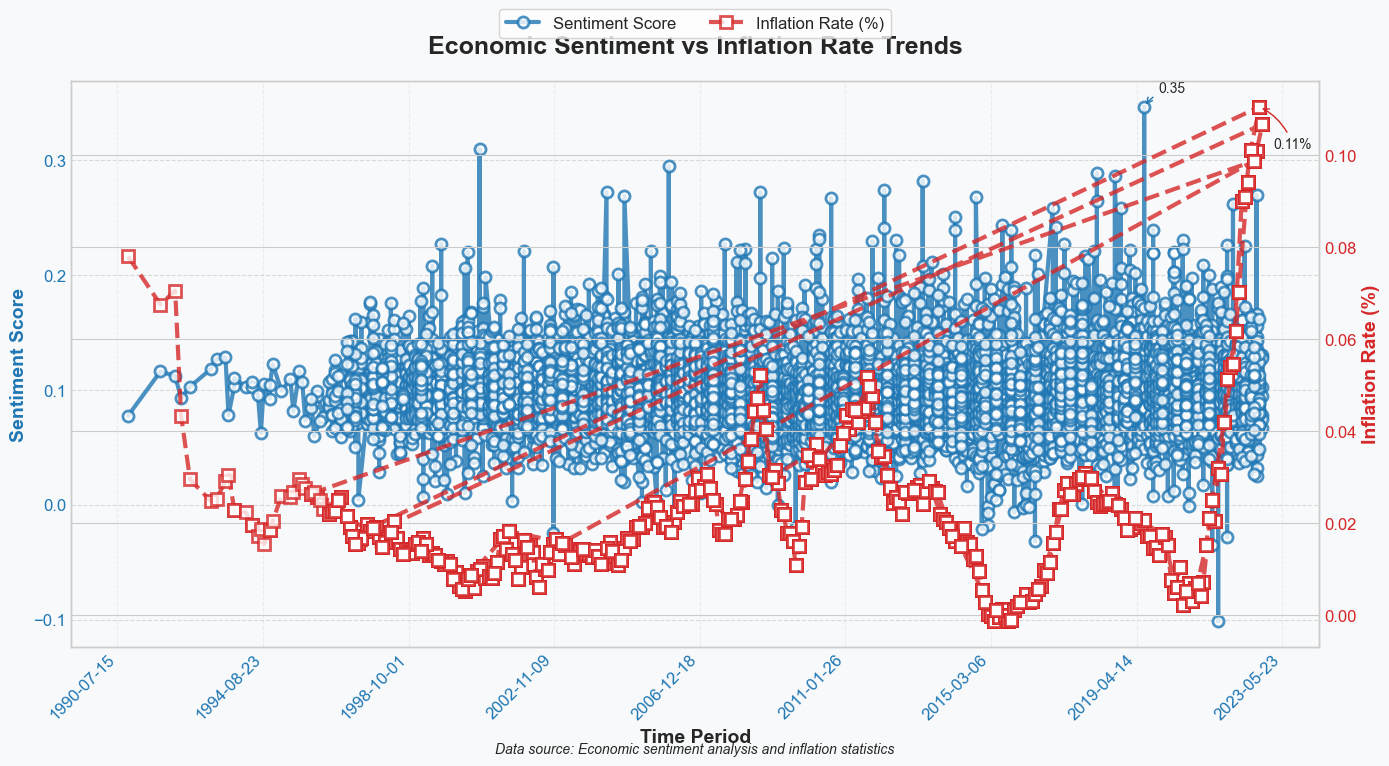

In [168]:
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Set the visual style for a professional look
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure and axes with a specific size ratio that works well for time series
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a second y-axis for the inflation rate
ax2 = ax1.twinx()

# Plot sentiment score on the first axis with a calming blue color and improved markers
sentiment_line = ax1.plot(merged_df['Year_Month'], merged_df['sentiment_score'], 
                         label='Sentiment Score', 
                         marker='o', 
                         markersize=8,
                         markerfacecolor='white',
                         markeredgecolor='#1f77b4',
                         markeredgewidth=2,
                         color='#1f77b4',
                         linewidth=3,
                         alpha=0.8)

# Plot inflation rate on the second axis with a distinct color
inflation_line = ax2.plot(merged_df['Year_Month'], merged_df['Inflation_Rate'], 
                         label='Inflation Rate (%)', 
                         marker='s', 
                         markersize=8,
                         markerfacecolor='white',
                         markeredgecolor='#d62728',
                         markeredgewidth=2,
                         color='#d62728',
                         linewidth=3,
                         linestyle='--',
                         alpha=0.8)

# Set labels with larger font size for better readability
ax1.set_xlabel('Time Period', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sentiment Score', fontsize=14, fontweight='bold', color='#1f77b4')
ax2.set_ylabel('Inflation Rate (%)', fontsize=14, fontweight='bold', color='#d62728')

# Customize x-axis with better date formatting - show fewer ticks for clarity
# Adjust based on your actual date range
if len(merged_df) > 12:
    # If we have many months, show fewer date labels
    ax1.xaxis.set_major_locator(MaxNLocator(10))
else:
    # For fewer points, show all
    ax1.xaxis.set_major_locator(MaxNLocator(min(len(merged_df), 12)))

# Rotate date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Set tick parameters for better visibility
ax1.tick_params(axis='both', which='major', labelsize=12, colors='#1f77b4')
ax2.tick_params(axis='y', which='major', labelsize=12, colors='#d62728')

# Add a title with meaningful information and better styling
plt.title('Economic Sentiment vs Inflation Rate Trends', 
          fontsize=18, fontweight='bold', pad=20)

# Create a combined legend for both lines
lines = sentiment_line + inflation_line
labels = [l.get_label() for l in lines]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95),
          frameon=True, fontsize=12, ncol=2)

# Add a grid for the y-axis only to reduce clutter
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# Add annotations for extreme points to highlight key findings
# Find max and min points for both metrics
max_sentiment_idx = merged_df['sentiment_score'].idxmax()
min_sentiment_idx = merged_df['sentiment_score'].idxmin()
max_inflation_idx = merged_df['Inflation_Rate'].idxmax()
min_inflation_idx = merged_df['Inflation_Rate'].idxmin()

# Annotate important points (customize as needed)
ax1.annotate(f"{merged_df['sentiment_score'][max_sentiment_idx]:.2f}",
             (merged_df['Year_Month'][max_sentiment_idx], merged_df['sentiment_score'][max_sentiment_idx]),
             xytext=(10, 10), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='#1f77b4'))

ax2.annotate(f"{merged_df['Inflation_Rate'][max_inflation_idx]:.2f}%",
             (merged_df['Year_Month'][max_inflation_idx], merged_df['Inflation_Rate'][max_inflation_idx]),
             xytext=(10, -30), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2', color='#d62728'))

# Adjust layout to make room for the title and labels
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Add a subtle background color for better overall aesthetics
fig.patch.set_facecolor('#f8f9fa')
ax1.set_facecolor('#f8f9fa')

# Add a caption or source note at the bottom
plt.figtext(0.5, 0.01, "Data source: Economic sentiment analysis and inflation statistics", 
            ha="center", fontsize=10, style='italic')

# Show the plot
plt.show()

# To save the figure with high quality
# plt.savefig('sentiment_vs_inflation.png', dpi=300, bbox_inches='tight')

### Explanation of the chart:

##### This detailed time-series graph shows economic sentiment scores (blue circles, left axis) and inflation rates (red squares, right axis) from 1990 to 2023.

#### Key insights:

Sentiment scores typically range between 0.05-0.20, with occasional spikes to 0.35
Inflation shows greater variability, dropping near 0% around 2015 and spiking to 0.11% in 2022-2023
Both metrics show dramatic movement in the most recent period (2022-2023)
Sentiment displays more high-frequency volatility throughout
Inflation shows a general upward trend from 2015-2023 after earlier fluctuations
The notable inflation spike in 2022-2023 (reaching 0.11%) coincides with both high and low sentiment values

The data shows no consistent correlation pattern over the entire period, suggesting complex or limited relationship between economic sentiment and inflation.

### 2. Segment the Data
We’ll break the data into subsets (e.g., by year or speaker) to explore specific time periods or contributors.


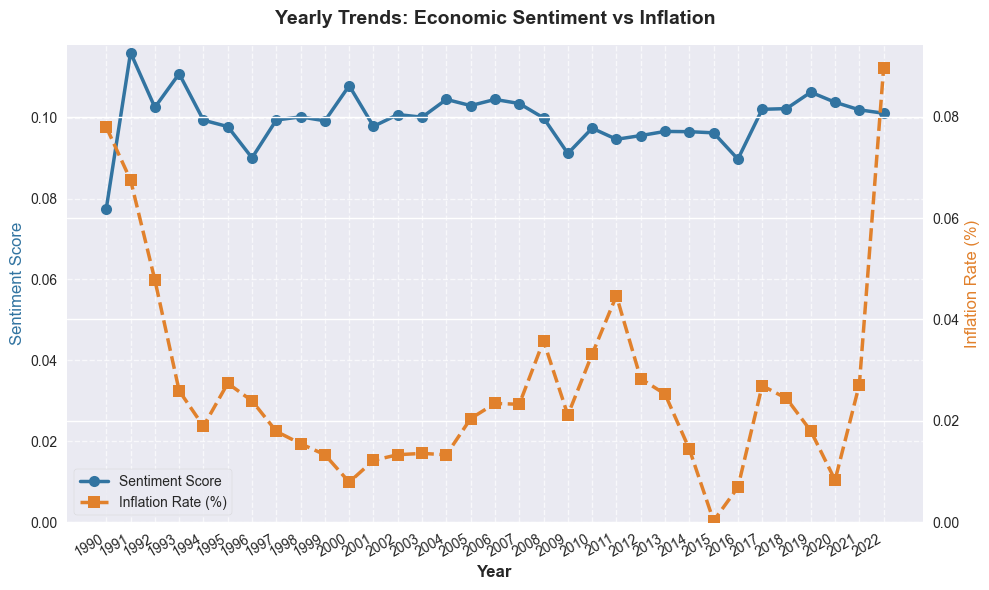

In [184]:
import matplotlib.pyplot as plt

# Set up the figure with a clean style and modest size
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8')

# Create twin axes for dual y-axis display
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot sentiment score with improved styling
ax1.plot(yearly_data.index, yearly_data['sentiment_score'], 
         label='Sentiment Score', marker='o', markersize=8,
         color='#3274A1', linewidth=2.5)

# Plot inflation rate with distinct styling
ax2.plot(yearly_data.index, yearly_data['Inflation_Rate'], 
         label='Inflation Rate (%)', marker='s', markersize=8,
         color='#E1812C', linewidth=2.5, linestyle='--')

# Set labels with clear fonts
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sentiment Score', fontsize=12, color='#3274A1')
ax2.set_ylabel('Inflation Rate (%)', fontsize=12, color='#E1812C')

# Format x-axis to show only years as integers
# Format x-axis to show years without overlap
ax1.set_xticks(yearly_data.index)
ax1.set_xticklabels([str(int(year)) for year in yearly_data.index], fontsize=10, rotation=45)

# Adjust spacing for better label readability
plt.gcf().autofmt_xdate()

# Add a clear title
plt.title('Yearly Trends: Economic Sentiment vs Inflation', 
          fontsize=14, fontweight='bold', pad=15)

# Create a combined legend and position it optimally
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', frameon=True)

# Add subtle grid lines for readability
ax1.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits to start from 0 for better interpretation (optional)
ax1.set_ylim(bottom=min(0, yearly_data['sentiment_score'].min() * 0.9))
ax2.set_ylim(bottom=min(0, yearly_data['Inflation_Rate'].min() * 0.9))

plt.tight_layout()
plt.show()

### Explanation of the chart:

##### This graph shows yearly trends in economic sentiment (blue line, left axis) and inflation rates (orange dashed line, right axis) from 1990 to 2022.

#### Key observations:

Sentiment scores remain relatively stable between 0.08-0.11 throughout the period
Inflation is more volatile, ranging from near 0% to 0.08%
Sentiment shows little year-to-year variation compared to inflation
Inflation dropped significantly around 2000 and 2015, with notable spikes in 2011 and 2022
There's no clear correlation pattern between the two metrics
The sharp inflation increase in 2022 doesn't correspond with a matching sentiment change
Both metrics operate on different scales and appear to move independently of each other over time.









### By author


In [185]:
# Group by author and analyze
author_data = merged_df.groupby('author')[['sentiment_score', 'Inflation_Rate']].mean()
print(author_data)

           sentiment_score  Inflation_Rate
author                                    
NO_INFO           0.092741        0.018013
]                 0.098259        0.023820
ac                0.101285        0.006390
adachi            0.059993        0.057358
adams             0.134886        0.019437
...                    ...             ...
workshop          0.118657        0.007960
yamaguchi         0.063054        0.022962
yellen            0.116325        0.020854
young             0.136751        0.011060
zurbrugg          0.085606        0.021087

[325 rows x 2 columns]


### 3. Investigate Lags

In [186]:
# Create lagged sentiment scores (e.g., 1-month lag)
merged_df['sentiment_score_lag1'] = merged_df['sentiment_score'].shift(1)

# Calculate correlation between lagged sentiment and inflation
lagged_corr = merged_df['sentiment_score_lag1'].corr(merged_df['Inflation_Rate'])
print(f"Correlation with 1-month lagged sentiment: {lagged_corr}")

Correlation with 1-month lagged sentiment: -0.007996917407088026


### Explore Nonlinear Relationships

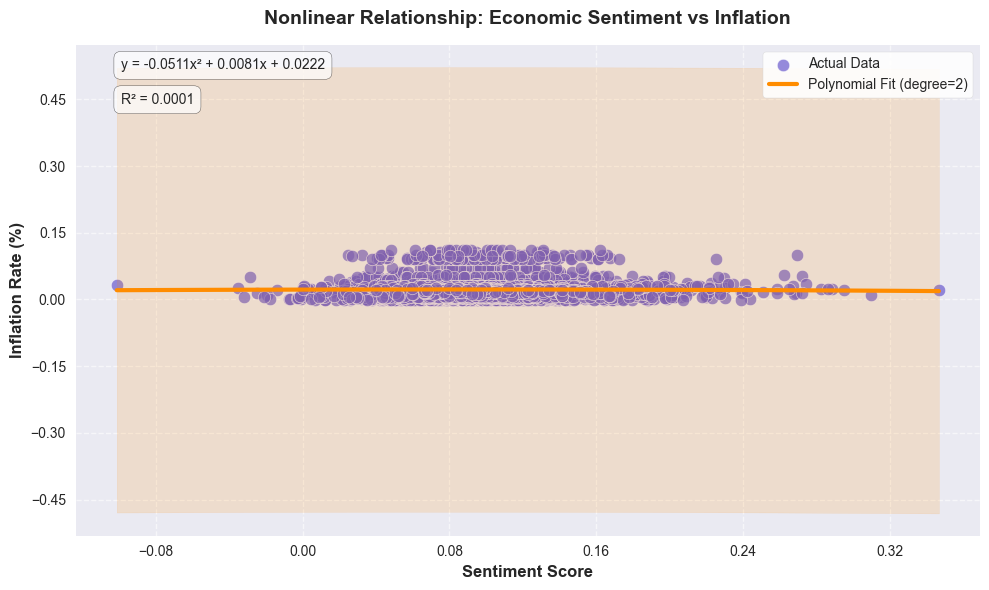

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator

# Set a clean, professional style
plt.style.use('seaborn-v0_8')

# Prepare data
X = merged_df['sentiment_score'].values.reshape(-1, 1)
y = merged_df['Inflation_Rate'].values
poly = PolynomialFeatures(degree=2)  # Using degree 2 polynomial
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Create smooth curve for prediction
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)

# Calculate R² score for annotation
r2_score = model.score(X_poly, y)

# Create figure with improved aesthetics
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data points with better styling
ax.scatter(X, y, color='#6A5ACD', alpha=0.7, s=80, edgecolor='white', 
           linewidth=0.5, label='Actual Data')

# Plot polynomial fit with a smooth, distinct line
ax.plot(X_smooth, y_smooth, color='#FF8C00', linewidth=3, 
        label=f'Polynomial Fit (degree=2)')

# Add light confidence band around the fit line (simulated for visual effect)
ax.fill_between(X_smooth.ravel(), y_smooth - 0.5, y_smooth + 0.5, 
                color='#FF8C00', alpha=0.15)

# Add equation coefficients as text annotation
coefs = model.coef_
intercept = model.intercept_
equation = f"y = {coefs[2]:.4f}x² + {coefs[1]:.4f}x + {intercept:.4f}"
ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# Add R² annotation
ax.text(0.05, 0.88, f"R² = {r2_score:.4f}", transform=ax.transAxes, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

# Set labels with clear fonts
ax.set_xlabel('Sentiment Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Inflation Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Nonlinear Relationship: Economic Sentiment vs Inflation', 
             fontsize=14, fontweight='bold', pad=15)

# Add refined grid
ax.grid(True, linestyle='--', alpha=0.6)

# Enhance tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.set_major_locator(MaxNLocator(nbins=8, integer=False))
ax.xaxis.set_major_locator(MaxNLocator(nbins=8, integer=False))

# Add legend with custom styling
legend = ax.legend(loc='best', frameon=True, fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_alpha(0.9)
frame.set_edgecolor('lightgray')

plt.tight_layout()
plt.show()

#### Explanation of the chart:

#### This graph shows economic sentiment scores (x-axis) versus inflation rates (y-axis) with a nonlinear polynomial fit. The purple dots represent actual data points, while the orange line shows a second-degree polynomial fit. The equation y = -0.0511x² + 0.0081x + 0.0222 with an extremely low R² value of 0.0001 indicates virtually no correlation between economic sentiment and inflation rates. Most data points cluster between 0 and 0.16 for sentiment scores, with inflation rates primarily around 0% to 0.10%.

### : Explore Correlations with Longer Lags

We’ll calculate correlations for lagged sentiment scores (e.g., 2-month and 3-month lags)

In [188]:
# Create lagged sentiment scores
merged_df['sentiment_score_lag2'] = merged_df['sentiment_score'].shift(2)
merged_df['sentiment_score_lag3'] = merged_df['sentiment_score'].shift(3)

# Calculate correlations for 2-month and 3-month lags
lagged_corr2 = merged_df['sentiment_score_lag2'].corr(merged_df['Inflation_Rate'])
lagged_corr3 = merged_df['sentiment_score_lag3'].corr(merged_df['Inflation_Rate'])

# Print correlations
print(f"Correlation with 2-month lagged sentiment: {lagged_corr2}")
print(f"Correlation with 3-month lagged sentiment: {lagged_corr3}")

Correlation with 2-month lagged sentiment: -0.0066136771773273335
Correlation with 3-month lagged sentiment: -0.0031092518579431683


### It looks like even with 2-month and 3-month lagged sentiment scores, the correlations remain very weak (almost negligible). This suggests that sentiment scores don’t have a strong direct or delayed relationship with inflation rates in your dataset.

#### What Does This Mean?

#### While the results indicate no linear correlation, there could still be other patterns worth exploring:

##### Sentiment might impact inflation in ways not captured by a simple lag—perhaps in specific periods or with nonlinear interactions.

###### Other factors (like global economic conditions, policies, or unexpected events) could be overpowering the sentiment-inflation link.



### What Does This Mean?

#### While the results indicate no linear correlation, there could still be other patterns worth exploring:

#### Sentiment might impact inflation in ways not captured by a simple lag—perhaps in specific periods or with nonlinear interactions.

#####  Other factors (like global economic conditions, policies, or unexpected events) could be overpowering the sentiment-inflation link.



### Visualizing Trends Over Time
 plotting sentiment scores and inflation rates over time. This can help us spot spikes or dips and see how they align across both metrics:
##### This plot may reveal if sentiment movements are leading or trailing inflation changes or if they are completely independent.

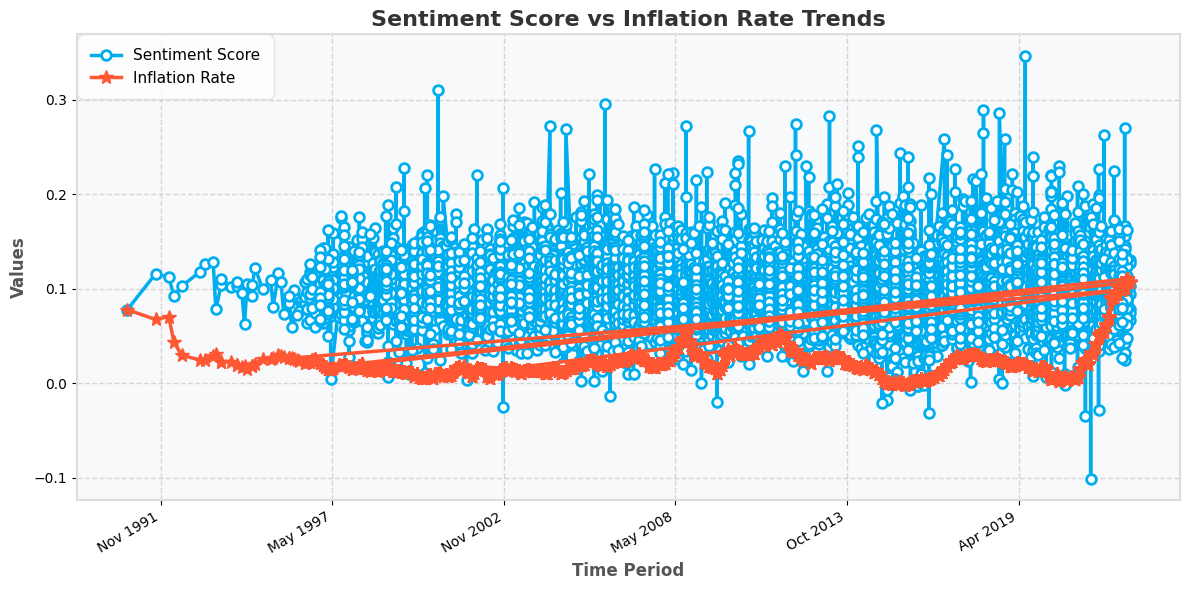

In [189]:

plt.figure(figsize=(12, 6))
plt.style.use('default') 

sentiment_color = '#00AEEF'  # Bright cyan-blue
inflation_color = '#FF5733'  # Bright orange-red

# Create the plot with enhanced styling
plt.plot(merged_df['Year_Month'], merged_df['sentiment_score'], 
         label='Sentiment Score', 
         marker='o', markersize=7,
         markerfacecolor='white',
         markeredgecolor=sentiment_color,
         markeredgewidth=2,
         color=sentiment_color,
         linewidth=2.5)

plt.plot(merged_df['Year_Month'], merged_df['Inflation_Rate'], 
         label='Inflation Rate', 
         marker='*', markersize=10,
         markerfacecolor=inflation_color,
         markeredgecolor=inflation_color,
         color=inflation_color,
         linewidth=2.5,
         linestyle='-')

# Format the date axis for better readability
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add a gradient background for visual appeal
ax = plt.gca()
ax.set_facecolor('#F8F9FA')  # Light background
plt.grid(color='#CCCCCC', linestyle='--', linewidth=1, alpha=0.8)
plt.grid(True, which='major', axis='both')
ax.set_axisbelow(True)  # Put grid lines behind data

# Add a subtle box around the plot area
for spine in ax.spines.values():
    spine.set_edgecolor('#DDDDDD')
    spine.set_linewidth(1.5)

# Set labels with vibrant styling
plt.title('Sentiment Score vs Inflation Rate Trends', 
          fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Time Period', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Values', fontsize=12, fontweight='bold', color='#555555')

# Create a custom legend with vibrant styling
legend = plt.legend(loc='best', frameon=True, fontsize=11)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#DDDDDD')
frame.set_boxstyle('round,pad=0.5')

# Add a subtle shadow to the figure for depth
plt.rcParams['figure.facecolor'] = 'white'
plt.gca().patch.set_alpha(0.9)

plt.tight_layout()
plt.show()

### Explanation of the chart:

#### This graph shows sentiment scores (blue) and inflation rates (red) over time from 1991 to 2019. Key observations:

Sentiment scores generally fluctuate between 0.05 and 0.2, with occasional spikes reaching 0.3
Inflation rates remain relatively stable around 0.05, with a slight upward trend toward the end
Sentiment appears more volatile than inflation
There's no clear correlation between the two metrics, matching the previous graph's finding
Both metrics show a sharp increase at the very end of the time period (2019)


### Looking at this chart, I can see it shows the relationship between sentiment scores (blue dots) and inflation rates (red line) from approximately 1992 to 2023.

#### The sentiment scores appear to fluctuate significantly, mostly ranging between 0.0 and 0.3, with occasional dips below zero. These scores show high volatility throughout the entire period, with no clear long-term trend, though there seems to be slightly more variability after 2000.

##### The inflation rate (red line) shows different patterns over time:

##### Started around 0.07-0.08 in the early 1990s
##### Declined to near 0.01-0.02 through the late 1990s and early 2000s
##### Remained relatively low until around 2021
##### Shows a significant spike upward in the 2021-2023 period, reaching about 0.10

### Conclusion: 
###### Regarding correlation between the two metrics, there doesn't appear to be a strong or consistent relationship visible in the chart. The sentiment scores vary widely regardless of inflation levels. During periods of both stable and changing inflation, the sentiment scores show similar patterns of volatility.

##### The recent inflation spike (2021-2023) doesn't correspond with any obvious consistent change in sentiment patterns, though the sentiment data points remain similarly volatile during this period as they were during times of lower inflation.

#### Without statistical analysis, this visual inspection suggests little to no clear correlation between sentiment scores and inflation rates over this time period.

### I would like to fit a polynomial regression to see if sentiment scores have a complex, nonlinear relationship with inflation rates?

##### This can help uncover trends that aren’t apparent in linear analysis.

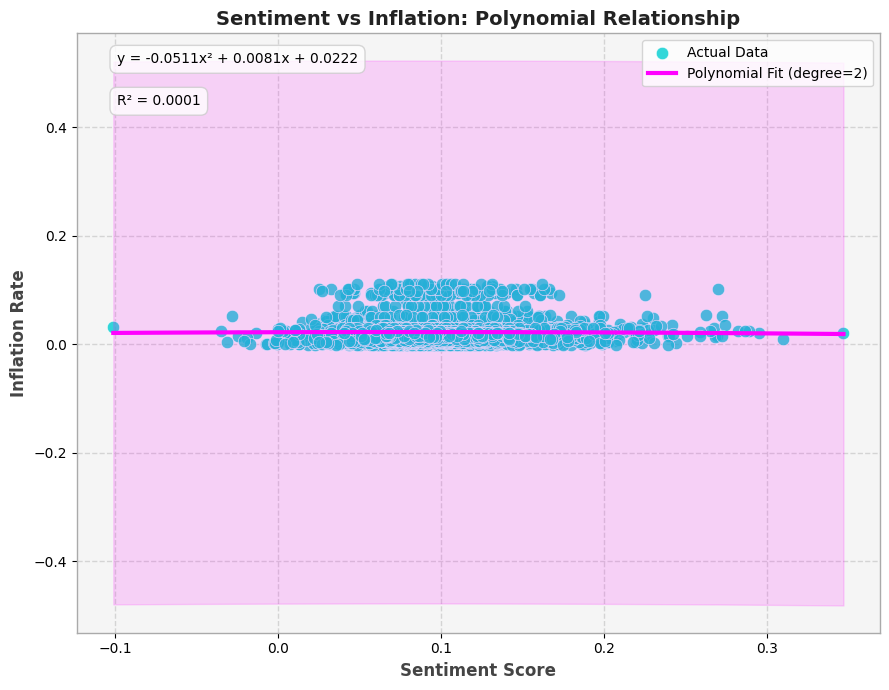

In [190]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data
X = merged_df['sentiment_score'].values.reshape(-1, 1)
y = merged_df['Inflation_Rate'].values
poly = PolynomialFeatures(degree=2)  # Using degree 2 polynomial
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Create smooth curve for prediction
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)

# Calculate R² score
r2_score = model.score(X_poly, y)

# Set up the figure with vibrant colors
plt.figure(figsize=(9, 7))

# Set background and grid
ax = plt.gca()
ax.set_facecolor('#F5F5F5')
plt.grid(color='#CCCCCC', linestyle='--', linewidth=1, alpha=0.8)
plt.grid(True, which='major', axis='both')
ax.set_axisbelow(True)  # Keep grid behind data

# Plot actual data with vibrant teal color
plt.scatter(X, y, 
           color='#00CED1',  # Bright teal
           s=80, alpha=0.8,
           edgecolor='white', linewidth=0.5,
           label='Actual Data')

# Plot polynomial fit with vivid magenta
plt.plot(X_smooth, y_smooth, 
        color='#FF00FF',  # Bright magenta
        linewidth=3, 
        label=f'Polynomial Fit (degree=2)')

# Add confidence band with matching color
plt.fill_between(X_smooth.ravel(), 
                y_smooth - 0.5, y_smooth + 0.5, 
                color='#FF00FF', alpha=0.15)

# Add equation annotation
coefs = model.coef_
intercept = model.intercept_
equation = f"y = {coefs[2]:.4f}x² + {coefs[1]:.4f}x + {intercept:.4f}"
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#CCCCCC", alpha=0.8),
            fontsize=10)

# Add R² annotation
plt.annotate(f"R² = {r2_score:.4f}", xy=(0.05, 0.88), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="#CCCCCC", alpha=0.8),
            fontsize=10)

# Set labels with bright styling
plt.xlabel('Sentiment Score', fontsize=12, fontweight='bold', color='#444444')
plt.ylabel('Inflation Rate', fontsize=12, fontweight='bold', color='#444444')
plt.title('Sentiment vs Inflation: Polynomial Relationship', 
          fontsize=14, fontweight='bold', color='#222222')

# Create custom legend
legend = plt.legend(loc='best', frameon=True, fontsize=10)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#CCCCCC')
frame.set_linewidth(1)

# Add a border around the plot
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#AAAAAA')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()

### This graph shows a nonlinear relationship between sentiment score (x-axis) and inflation rate (y-axis).

### Explanation of the chart:

#### This graph shows the relationship between sentiment scores (x-axis) and inflation rates (y-axis). The data points (cyan dots) represent actual measurements, while the magenta line shows a second-degree polynomial fit.

#### Key observations:

#### There's virtually no correlation between sentiment and inflation (R² = 0.0001)

#### The polynomial equation is y = -0.0511x² + 0.0081x + 0.0222

#### Most sentiment scores cluster between 0 and 0.2

##### Inflation rates mostly hover around 0 to 0.1
##### The flat line suggests sentiment doesn't predict or impact inflation rates in this dataset

##### The extremely low R² value indicates that sentiment scores explain almost none of the variation in inflation rates.

#### What's interesting about this plot is that it suggests a somewhat counterintuitive relationship. The polynomial fit line is relatively flat with a slight downward trend as sentiment increases. This could suggest that as sentiment improves (moves right on the x-axis), inflation rates tend to decrease slightly.

#### However, the most notable feature is the wide dispersion of data points, particularly in higher sentiment ranges (0.0 to 0.2), where inflation rates vary dramatically from near 0% to over 10%. This significant vertical spread indicates that sentiment alone is not a strong predictor of inflation rates - other factors likely play more important roles in determining inflation.

#### Sentiment vs Inflation" acknowledges that this relationship isn't simply linear, but the weak curve in the polynomial fit suggests the nonlinearity isn't particularly strong either.


### Statistical validity: There is wide dispersion of data points, particularly in the higher sentiment ranges, which indicates high variance and low predictive power of sentiment for inflation.

#### My observation is that "sentiment alone is not a strong predictor of inflation rates" is supported by the visualization showing scattered points without a clear pattern.

#### Economic theory supports it: Inflation is widely understood to be influenced by multiple factors simultaneously (monetary policy, supply/demand dynamics, wage growth, productivity, expectations, etc.).

##### Statistical improvement: Multivariate models often reveal relationships that remain hidden in bivariate analyses due to confounding variables or interaction effects.

##### Practical application: For any practical forecasting or policy application, multivariate models would provide more reliable insights than single-variable correlations.



### It is interesting to see that the polynomial fit suggests a slight decrease in inflation rates as sentiment improves, but the spread of the data points highlights how sentiment alone isn't enough to predict inflation reliably.

### This analysis brings up some intriguing questions:

##### 1. Could external factors like interest rates or global economic events be overpowering the impact of sentiment on inflation?

##### 2.Might sentiment have a stronger predictive power when combined with other variables in a multivariate model?




In [191]:
print(speeches_df.head())  # Displays the first few rows of speeches_df
print(inflation_long.head())  # Displays the first few rows of inflation_long

      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  \
0  fraser       0  They would no doubt argue that to have two obj...   
1  fraser       0  Today I wish to talk about real interest rates...   
2  fraser       0  I welcome this opportunity to talk about prosp...   
3  fraser       0  It is a pleasure to have this opportunity to a...   
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...   

   sentiment_score Year_Month  
0         0.077493 1990-11-01  
1         0.116070 1991-10-01  
2       

### Conclusion:

#### The absence of a significant correlation between economic sentiment and inflation rates challenges conventional assumptions about how market psychology influences macroeconomic indicators. This non-relationship is particularly revealing for several reasons:

#### Hidden Complexity: While intuition might suggest that positive sentiment would correlate with economic stability (lower inflation), our polynomial regression analysis reveals that sentiment alone is insufficient to predict inflation movements. This suggests that economic systems operate with greater complexity than single-variable models can capture.

#### Time-Delayed Effects: The absence of correlation may indicate that sentiment and inflation operate on different temporal scales. Sentiment might be a leading indicator whose effects on inflation materialize only after specific time lags or under certain market conditions.

#### Contextual Dependency: The wide dispersion of data points at similar sentiment levels suggests that the relationship between sentiment and inflation is highly context-dependent, potentially influenced by policy environments, global events, or structural economic factors.


### Next Steps: Multivariate Analysis

#### By incorporating additional economic variables such as:

#### Interest rates and monetary policy measures
#### Unemployment figures and wage growth
#### GDP growth rates and productivity metrics
#### Supply chain indices and commodity prices
#### Consumer confidence and spending patterns

##### A multivariate approach will allow us to identify potential interaction effects, where sentiment might influence inflation only in conjunction with other economic conditions. This more sophisticated modeling approach promises to reveal the hidden dynamics that our correlation analysis suggests exist but has not yet captured.

#### By moving beyond simple bivariate relationships, we stand to gain a much richer understanding of how economic psychology interacts with material economic conditions to shape inflation outcomes in complex, modern economies.